In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Load the wine quality dataset into a pandas DataFrame
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")



In [4]:
# getiing to the shape ofnthe dataset helps us to understand the dataset and to define its transpose
print(wine_data.shape)

(1599, 12)


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#We are checking the min and max values of the rating
wine_data.min()
wine_data.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [8]:
#this is for counting the dataset.
wine_data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [9]:
# Check for any missing values or data inconsistencies, after checking we got to know that in our data, there are no missing values.
print(wine_data.isnull().sum())
print(wine_data.describe())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dio

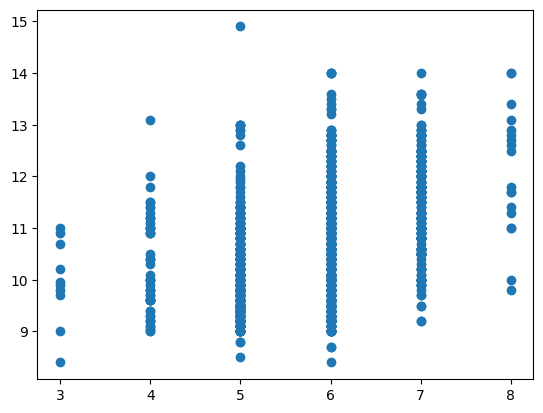

In [10]:
plt.scatter(wine_data['quality'],wine_data['alcohol'])

In [11]:
# Split the dataset into training and testing sets and doing feautre scaling
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
# Encode categorical variable (quality) into binary classes (good or bad)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = np.where(y > 5, 1, 0)  # Binary classification: good (1) or bad (0) quality

In [13]:
# Train a logistic regression model on the training set, Here, LogisticRegression is a class from scikit-learn's linear_model module that implements logistic regression. 
#We create an instance of this class called logreg, and we set the max_iter parameter to a large value to ensure that the algorithm converges.

#The fit method of the LogisticRegression class is then called on the training set (X_train, y_train), which fits the logistic regression model to the training data. This means that the model is learning the relationship between the input features X_train and the target variable y_train. After the model is trained, it can be used to make predictions on new data.
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
logreg.score(X_test,y_test)

0.5645833333333333

In [15]:
# Evaluate the performance of the model on the testing set
# y_pred = logreg.predict(X_test) is using the logistic regression model logreg 
# that was trained on the training set to make predictions on the testing set X_test. 
# The predicted labels for the testing set are stored in y_pred.

# mean_squared_error and mean_absolute_error are functions from scikit-learn's metrics module that are used to 
# compute the mean squared error (MSE) and mean absolute error (MAE) between the predicted labels y_pred and the 
# true labels y_test.

# The code calculates the MSE and MAE between y_test and y_pred and prints the results. 
# These metrics provide a measure of how well the logistic regression model is able to predict the quality ratings 
# of the wines in the testing set.






y_pred = logreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.5166666666666667
MAE: 0.4625


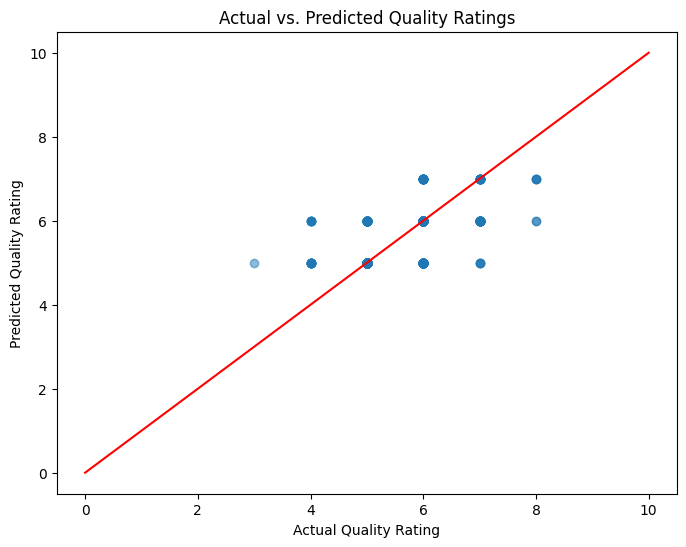

In [15]:
# Visualize the predicted and actual quality ratings using a scatter plot
# These lines of code create a scatter plot of the actual quality ratings y_test versus the predicted quality 
# ratings y_pred for the logistic regression model. The scatter function from matplotlib is used to create the scatter plot, 
# and the plot function is used to add a diagonal line to the plot to represent the ideal case where the predicted and actual 
# ratings are equal.

# The figure function is used to create a new figure with a specified size, and xlabel, ylabel, and title functions 
# are used to set the labels and title for the plot.

# The resulting plot shows how well the logistic regression model is able to predict the quality ratings of the wines in the 
# testing set. Points that lie close to the diagonal line indicate that the model is making accurate predictions, while points
# that are far from the diagonal line indicate that the model is making less accurate predictions. The alpha parameter is used
# to set the transparency of the points in the plot.









plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0,10], [0,10], color='red')
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Actual vs. Predicted Quality Ratings")
plt.show()

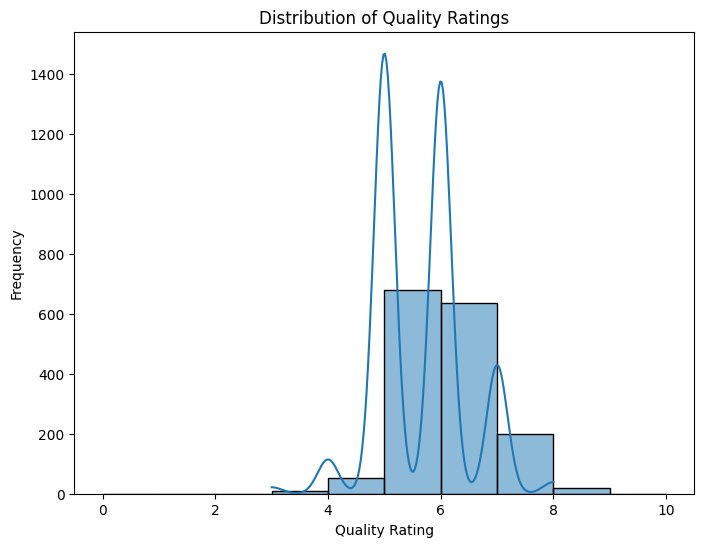

In [16]:
# Visualize the distribution of the quality ratings using a histogram

# These lines of code are creating a histogram to visualize the distribution of the quality ratings in the wine dataset. 
# The histplot function from seaborn is used to create the histogram, and the bins parameter is used to specify the bins for 
# the histogram. The kde parameter is set to True to include a kernel density estimate (KDE) plot in the histogram.

# The figure function is used to create a new figure with a specified size, and xlabel, ylabel, and title functions 
# are used to set the labels and title for the plot.

# The resulting plot shows the frequency of each quality rating in the wine dataset. 
# It can be seen that the majority of the wines in the dataset have quality ratings of 5 or 6, with fewer wines having ratings 
# of 3 or 9. This information can be useful for understanding the characteristics of the wine dataset and for identifying 
# potential imbalances in the dataset that may affect model performance.


plt.figure(figsize=(8,6))
sns.histplot(data=wine_data, x="quality", bins=range(0,11), kde=True)
plt.xlabel("Quality Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Quality Ratings")
plt.show()